IMPORTING LIBRARIES

In [131]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [132]:
df=pd.read_csv('boston_data.csv')
rename_dict = {
    "CRIM": "Crime_Rate",                # Per capita crime rate by town
    "ZN": "Residential_Land_Zone",       # Proportion of residential land zoned for large lots
    "INDUS": "Non_Retail_Land_Proportion", # Proportion of non-retail business acres per town
    "CHAS": "Proximity_to_Charles_River", # Charles River dummy variable (1 if tract bounds river, 0 otherwise)
    "NOX": "Nitric_Oxide_Concentration",  # Nitric oxide concentration (parts per 10 million)
    "RM": "Avg_Number_of_Rooms",          # Average number of rooms per dwelling
    "AGE": "Older_Homes_Proportion",      # Proportion of owner-occupied units built before 1940
    "DIS": "Distance_to_Employment_Centers", # Weighted distances to Boston employment centers
    "RAD": "Highway_Accessibility_Index",  # Accessibility to radial highways
    "TAX": "Property_Tax_Rate",            # Full-value property tax rate per $10,000
    "PTRATIO": "Pupil_Teacher_Ratio",      # Pupil-teacher ratio by town
    "B": "Black_Proportion",               # 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents
    "LSTAT": "Lower_Status_Population",    # Percentage of lower status of the population
    "MEDV": "Median_House_Price"           # Median value of owner-occupied homes in $1000s
}

# Rename the columns
df.rename(columns=rename_dict, inplace=True)

# Display the updated dataset's column names
print("Updated column names:")
print(df.columns)

Updated column names:
Index(['Crime_Rate', 'Residential_Land_Zone', 'Non_Retail_Land_Proportion',
       'Proximity_to_Charles_River', 'Nitric_Oxide_Concentration',
       'Avg_Number_of_Rooms', 'Older_Homes_Proportion',
       'Distance_to_Employment_Centers', 'Highway_Accessibility_Index',
       'Property_Tax_Rate', 'Pupil_Teacher_Ratio', 'Black_Proportion',
       'Lower_Status_Population', 'Median_House_Price'],
      dtype='object')


1. Exploratory Data Analysis (EDA)


In [133]:
df.shape

(506, 14)

In [134]:
df.describe()

,Crime_Rate,Residential_Land_Zone,Non_Retail_Land_Proportion,Proximity_to_Charles_River,Nitric_Oxide_Concentration,Avg_Number_of_Rooms,Older_Homes_Proportion,Distance_to_Employment_Centers,Highway_Accessibility_Index,Property_Tax_Rate,Pupil_Teacher_Ratio,Black_Proportion,Lower_Status_Population,Median_House_Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Crime_Rate                      506 non-null    float64
 1   Residential_Land_Zone           506 non-null    float64
 2   Non_Retail_Land_Proportion      506 non-null    float64
 3   Proximity_to_Charles_River      506 non-null    float64
 4   Nitric_Oxide_Concentration      506 non-null    float64
 5   Avg_Number_of_Rooms             506 non-null    float64
 6   Older_Homes_Proportion          506 non-null    float64
 7   Distance_to_Employment_Centers  506 non-null    float64
 8   Highway_Accessibility_Index     506 non-null    float64
 9   Property_Tax_Rate               506 non-null    float64
 10  Pupil_Teacher_Ratio             506 non-null    float64
 11  Black_Proportion                506 non-null    float64
 12  Lower_Status_Population         506 

In [136]:
df.isna()

,Crime_Rate,Residential_Land_Zone,Non_Retail_Land_Proportion,Proximity_to_Charles_River,Nitric_Oxide_Concentration,Avg_Number_of_Rooms,Older_Homes_Proportion,Distance_to_Employment_Centers,Highway_Accessibility_Index,Property_Tax_Rate,Pupil_Teacher_Ratio,Black_Proportion,Lower_Status_Population,Median_House_Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [137]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

In [138]:
df

,Crime_Rate,Residential_Land_Zone,Non_Retail_Land_Proportion,Proximity_to_Charles_River,Nitric_Oxide_Concentration,Avg_Number_of_Rooms,Older_Homes_Proportion,Distance_to_Employment_Centers,Highway_Accessibility_Index,Property_Tax_Rate,Pupil_Teacher_Ratio,Black_Proportion,Lower_Status_Population,Median_House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


VISUALIZING DATA

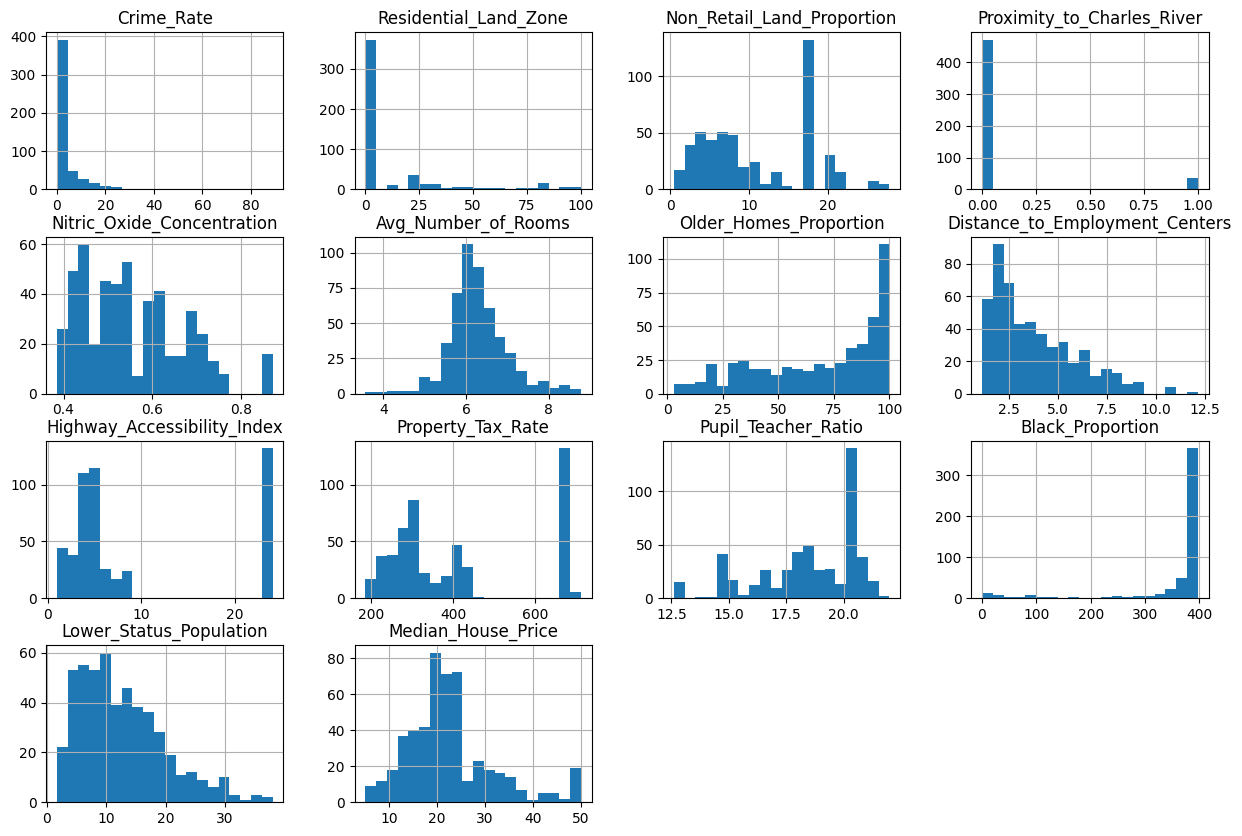

In [139]:
#histogram
df.hist(bins=20, figsize=(15, 10))
plt.show()


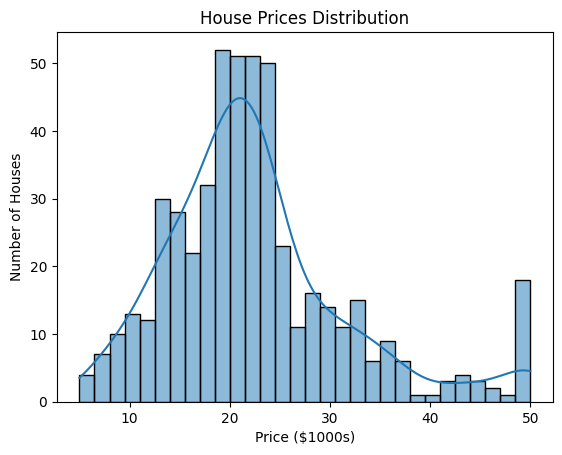

In [140]:
#The Target Variable Distribution 
sns.histplot(df['Median_House_Price'], kde=True, bins=30)
plt.title('House Prices Distribution')
plt.xlabel('Price ($1000s)')
plt.ylabel('Number of Houses')
plt.show()

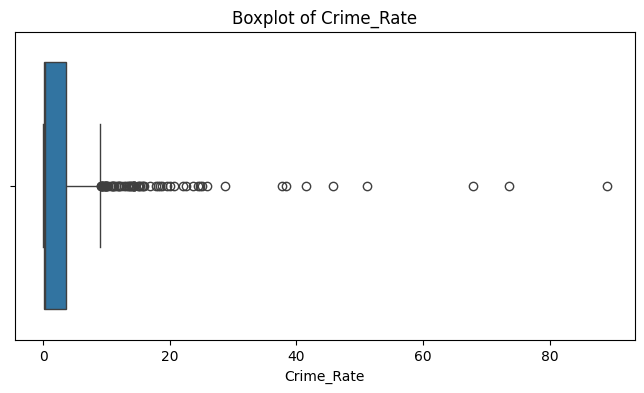

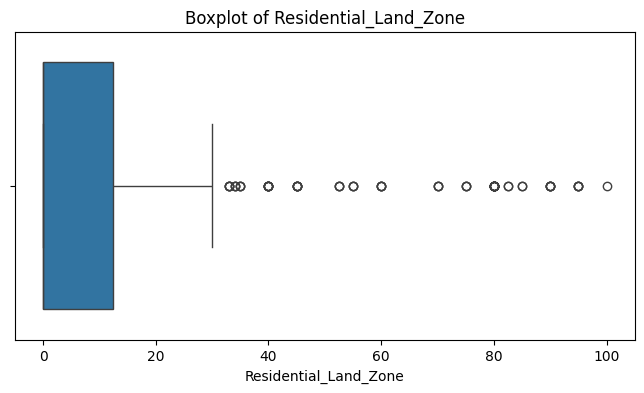

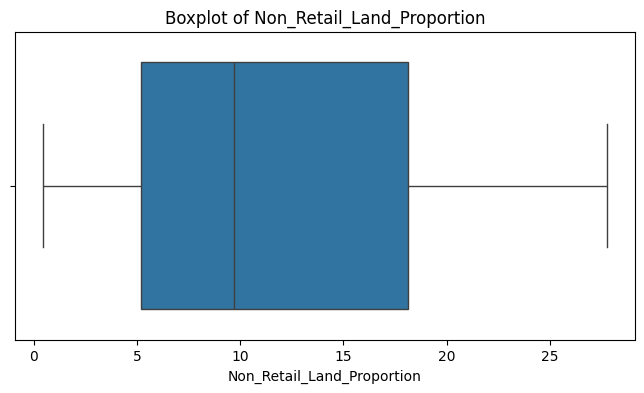

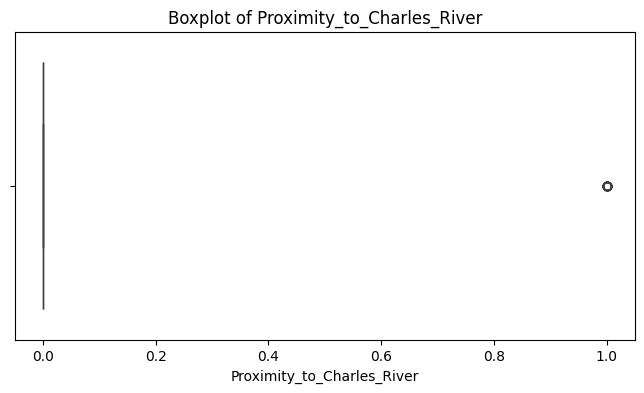

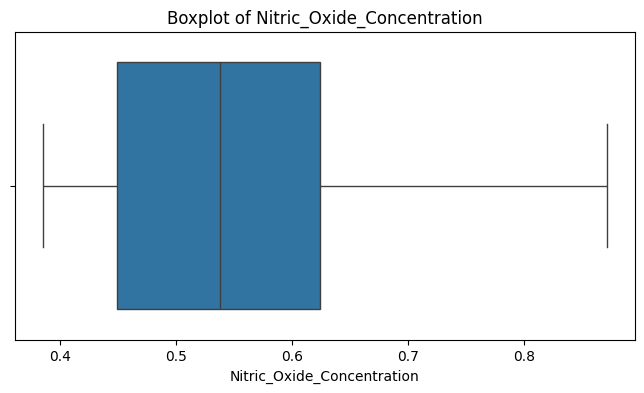

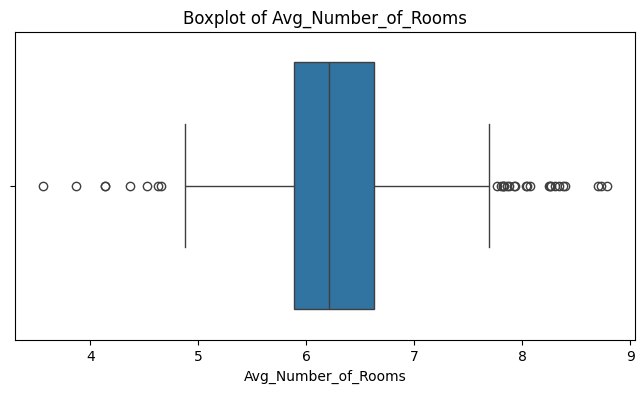

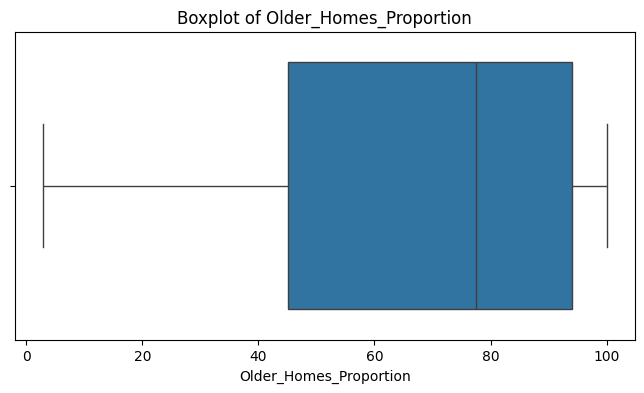

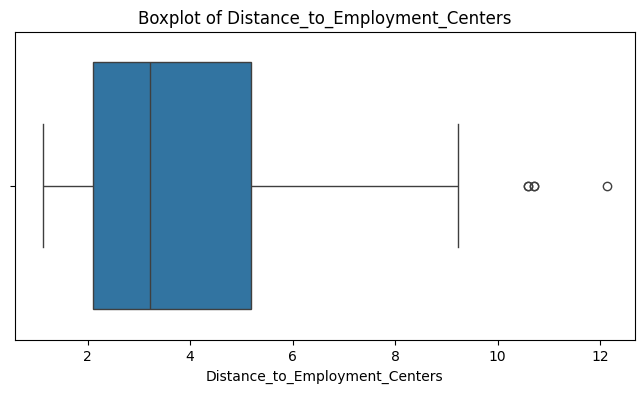

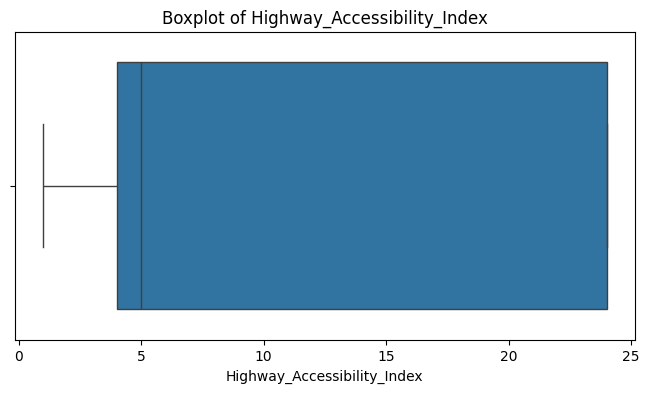

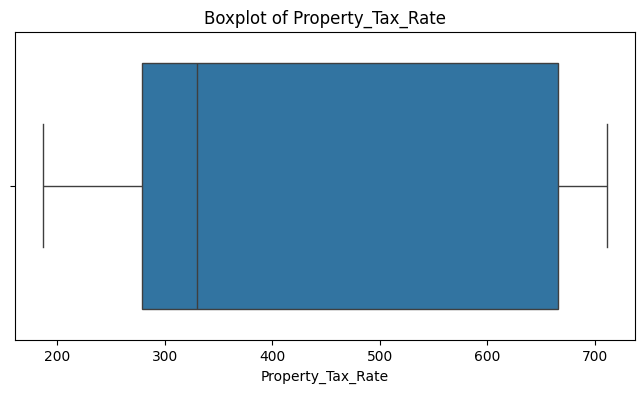

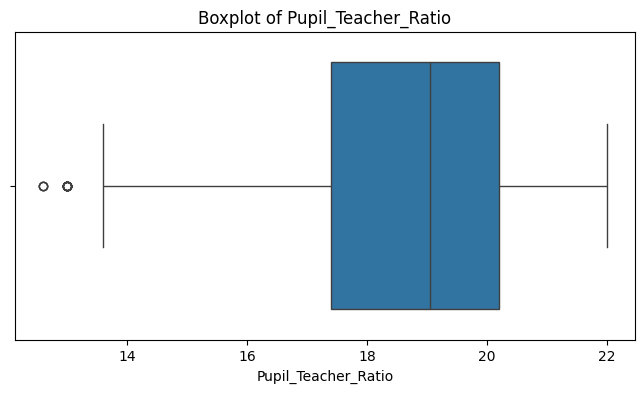

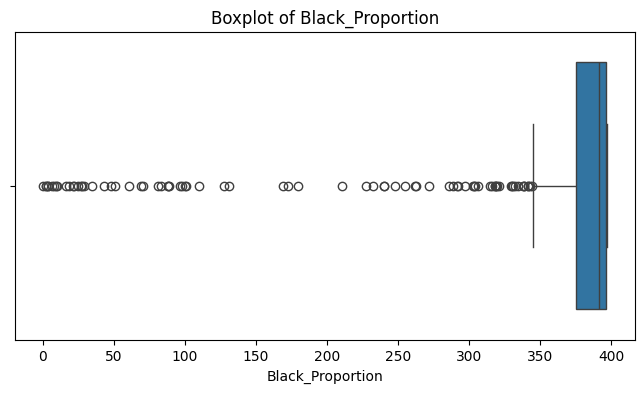

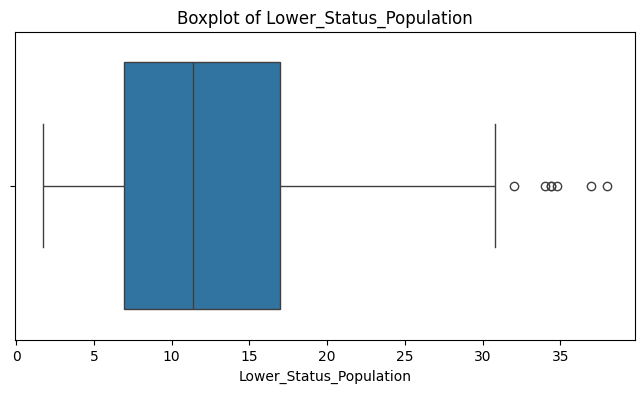

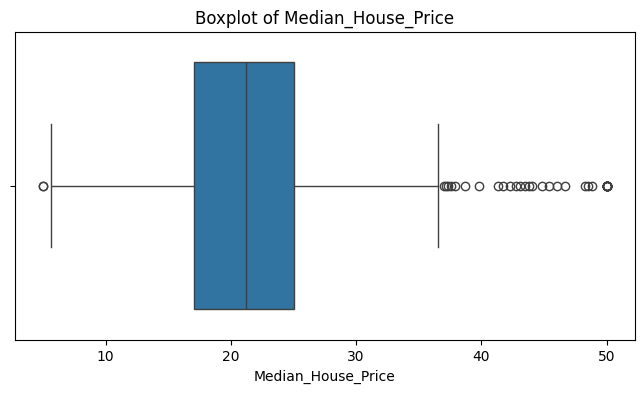

In [141]:
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

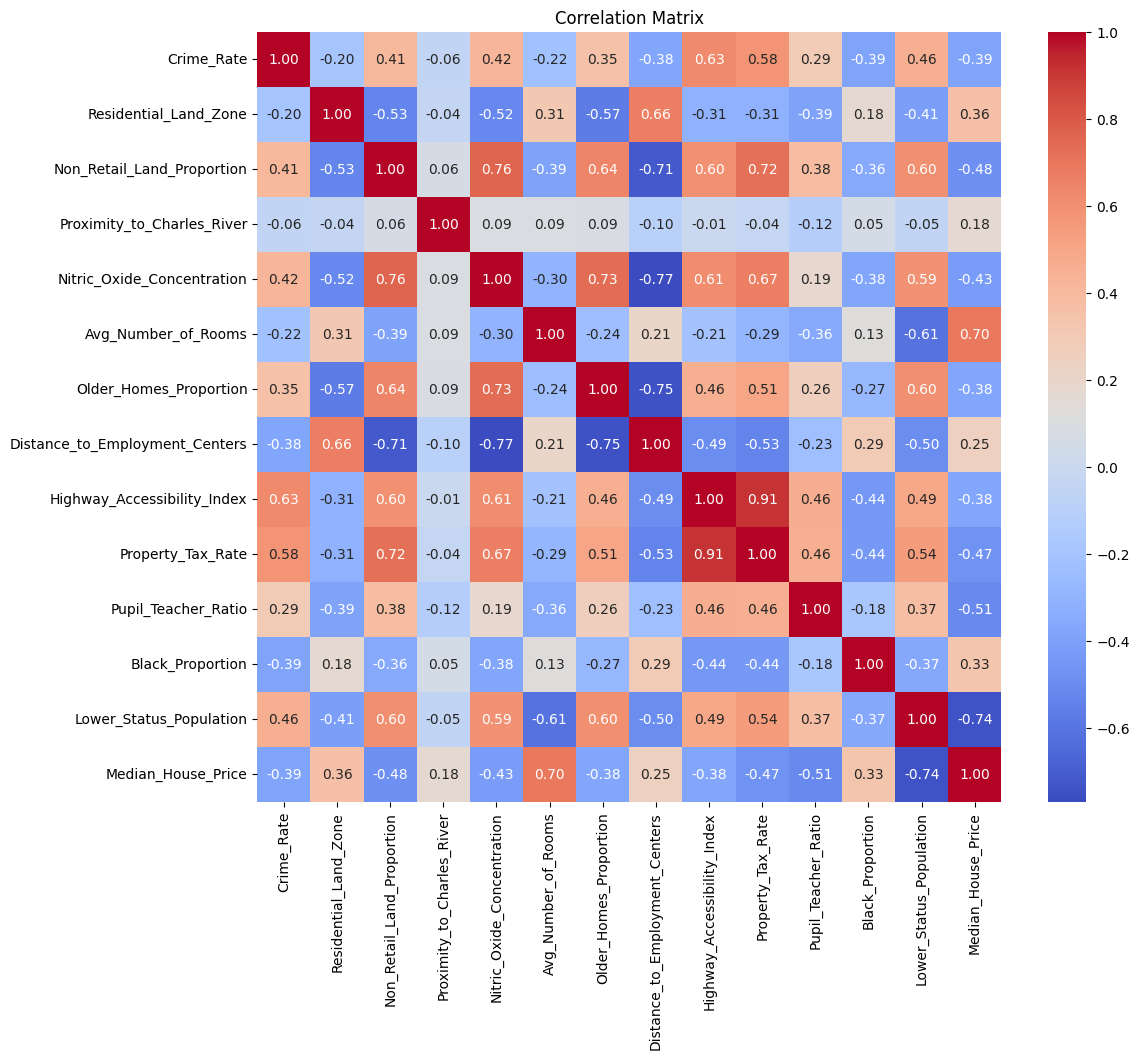

In [142]:
#CORRELATION MATRIX
corr = df.corr()
plt.figure(figsize=(12, 10))  # Adjust the width and height (12x10 here)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


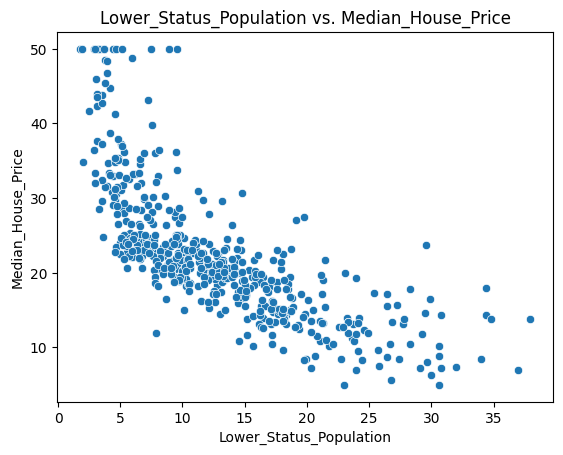

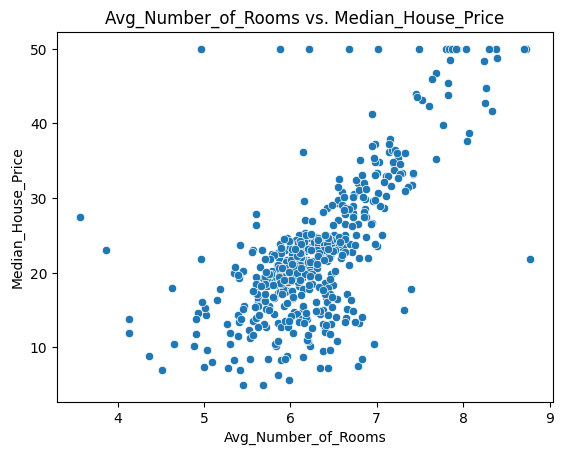

In [143]:


sns.scatterplot(x=df['Lower_Status_Population'], y=df['Median_House_Price'])
plt.title("Lower_Status_Population vs. Median_House_Price")
plt.show()

sns.scatterplot(x=df['Avg_Number_of_Rooms'], y=df['Median_House_Price'])
plt.title("Avg_Number_of_Rooms vs. Median_House_Price")
plt.show()


FEATURE SELECTION

In [144]:
#dropped cuz it doesnt add any value to training the model as it doesnt affect the houses prices this much and isnt actually reasonable
#dff=df.drop(columns=['Proximity_to_Charles_River']) 

#dff=df.drop(columns=['Residential_Land_Zone']) #dropped cuz the data is all zeros and is destroying the training + not that important


STANDARD SCALING and train test split

In [145]:
# Separate features (X) and target (y)
X = df.drop(columns=['Median_House_Price'])  # Replace 'Median_House_Price' with your target column name
y = df['Median_House_Price']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Scale the target
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Convert scaled features and target back to DataFrame/Series
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
y_scaled = pd.Series(y_scaled.flatten(), name='Median_House_Price')

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Print dataset sizes to confirm the split
print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Testing set size: {X_test.shape}, {y_test.shape}")


Training set size: (404, 13), (404,)
Testing set size: (102, 13), (102,)


TRAIN THE MODEL : LINEAR REGRESSION

In [146]:
# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2 * 100:.2f}%")  # Convert to percentage

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


R² Score: 66.88%
Mean Squared Error: 0.28774280014026593
R^2 Score: 0.6687594935356322


In [147]:
df

,Crime_Rate,Residential_Land_Zone,Non_Retail_Land_Proportion,Proximity_to_Charles_River,Nitric_Oxide_Concentration,Avg_Number_of_Rooms,Older_Homes_Proportion,Distance_to_Employment_Centers,Highway_Accessibility_Index,Property_Tax_Rate,Pupil_Teacher_Ratio,Black_Proportion,Lower_Status_Population,Median_House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


TRY AFTER REMOVIG OUTLIERS

In [148]:
from scipy.stats import zscore
import pandas as pd

# Calculate Z-scores for the dataset (excluding the target variable)
z_scores = zscore(df.drop(columns=['Median_House_Price']))  # Replace with your target column name
z_scores_df = pd.DataFrame(z_scores, columns=df.columns[:-1])  # Exclude the target column

# Identify rows where any feature has a Z-score > 3 or < -3
outliers = (z_scores_df.abs() > 3).any(axis=1)

# Remove rows with outliers
data_no_outliers = df[~outliers]

# Print the size of the original and cleaned datasets
print(f"Original dataset size: {df.shape}")
print(f"Dataset size after removing outliers: {data_no_outliers.shape}")




Original dataset size: (506, 14)
Dataset size after removing outliers: (415, 14)


VISUALIZE NO OUTLIERS 

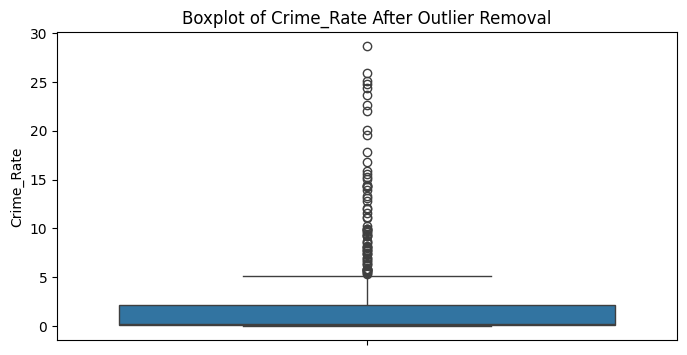

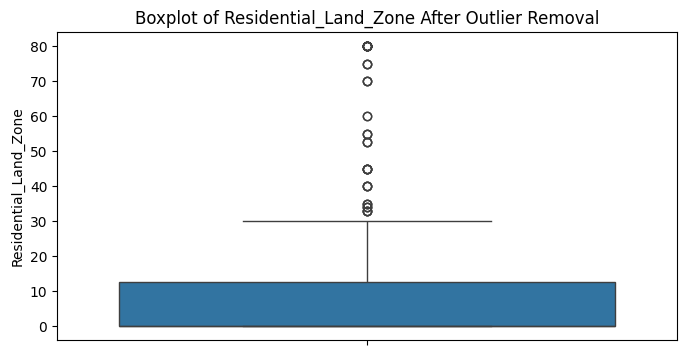

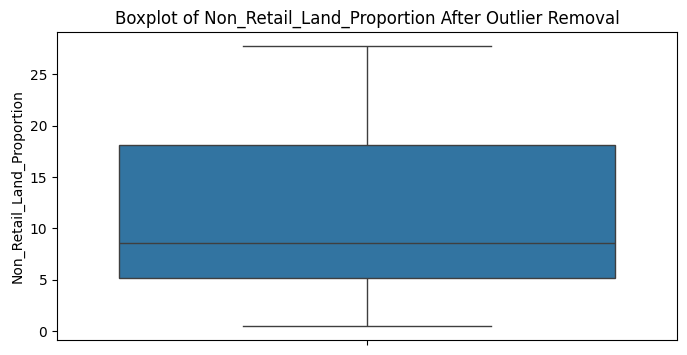

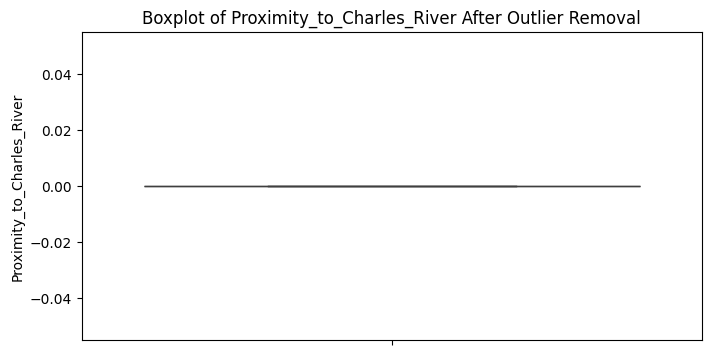

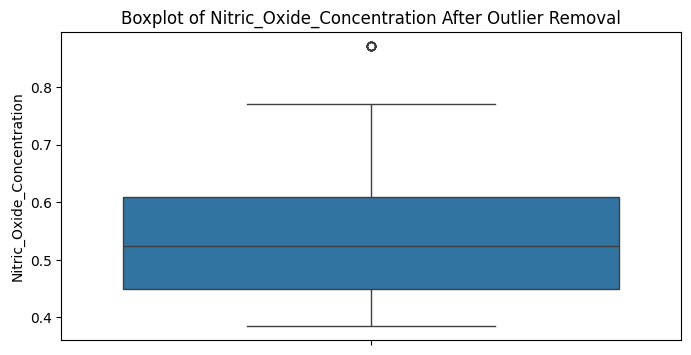

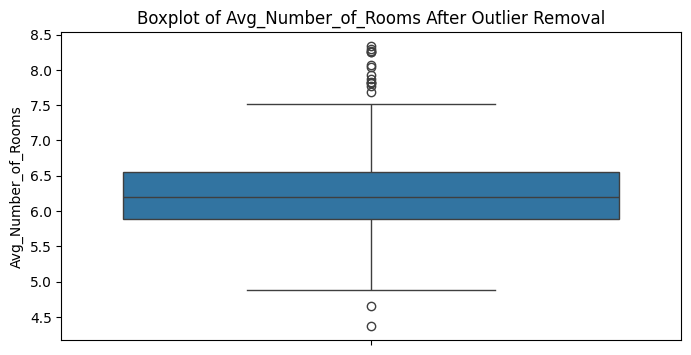

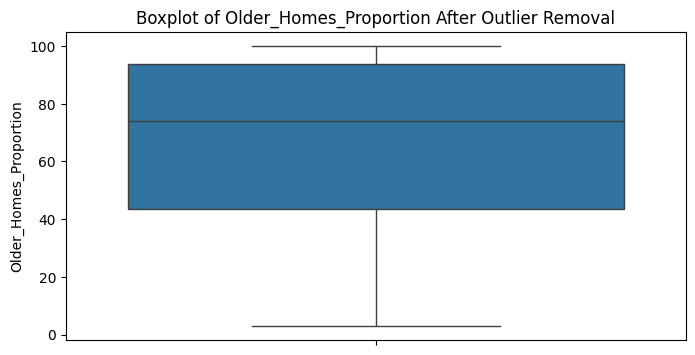

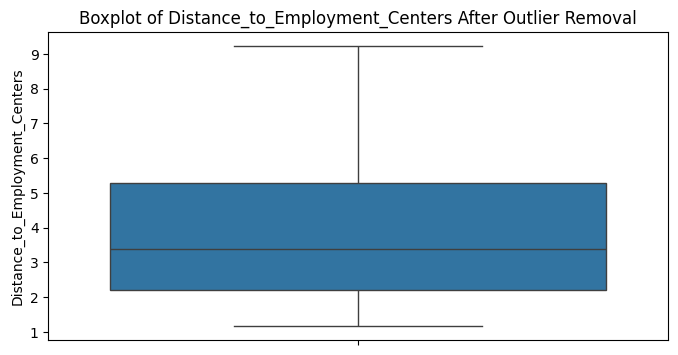

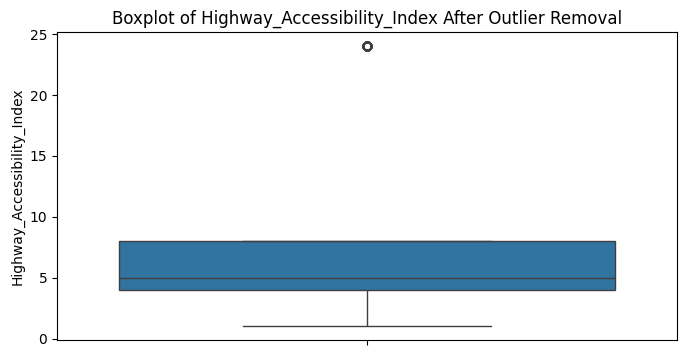

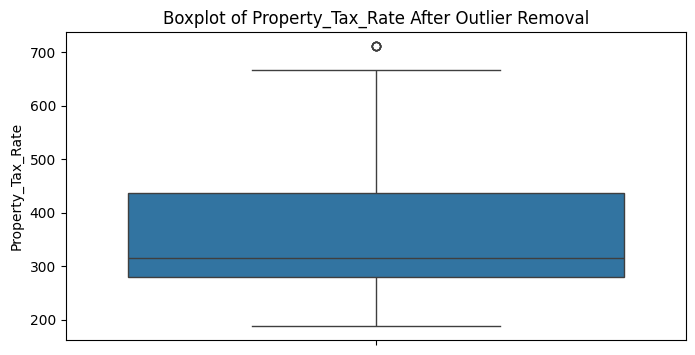

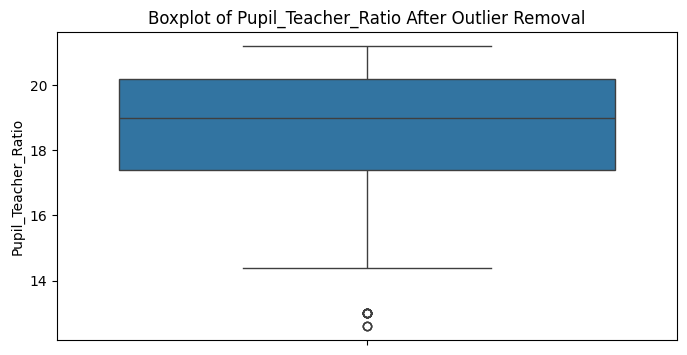

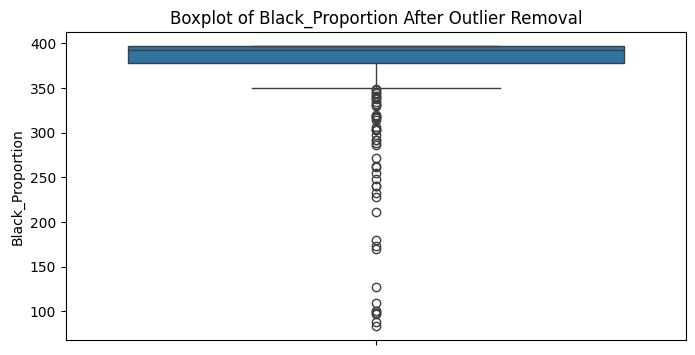

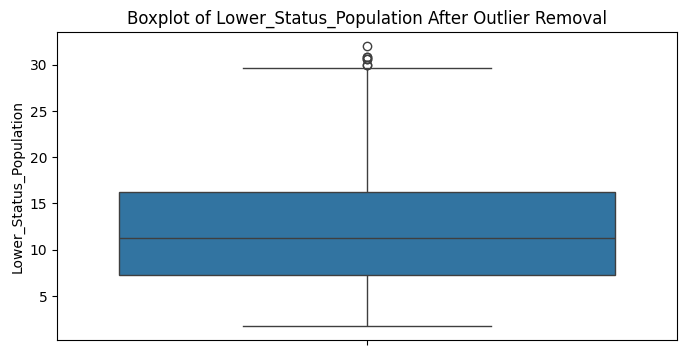

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to confirm removal of outliers
for col in data_no_outliers.columns[:-1]:  # Exclude the target column
    plt.figure(figsize=(8, 4))
    sns.boxplot(data_no_outliers[col])
    plt.title(f"Boxplot of {col} After Outlier Removal")
    plt.show()


TRAIN TEST SPLIT AND SCALING NO OUTLIERS

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Separate features (X) and target (y)
X_no_outliers = data_no_outliers.drop(columns=['Median_House_Price'])  # Replace with your target column name
y_no_outliers = data_no_outliers['Median_House_Price']

# Initialize the scaler
scaler = StandardScaler()

# Scale features
X_scaled = scaler.fit_transform(X_no_outliers)

# Scale target
y_scaled = scaler.fit_transform(y_no_outliers.values.reshape(-1, 1))

# Convert scaled features and target back to DataFrame/Series
X_scaled = pd.DataFrame(X_scaled, columns=X_no_outliers.columns)
y_scaled = pd.Series(y_scaled.flatten(), name='Median_House_Price')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Testing set size: {X_test.shape}, {y_test.shape}")


Training set size: (332, 13), (332,)
Testing set size: (83, 13), (83,)


TRAINING 

In [151]:
# Step 1: Initialize the model
model = LinearRegression()

# Step 2: Train the model on the training set
model.fit(X_train, y_train)

# Step 3: Make predictions on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 4: Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Step 5: Print the results
print(f"Training Mean Squared Error: {train_mse:.2f}")
print(f"Testing Mean Squared Error: {test_mse:.2f}")
print(f"Training R² Score: {train_r2 * 100:.2f}%")
print(f"Testing R² Score: {test_r2 * 100:.2f}%")


Training Mean Squared Error: 0.28
Testing Mean Squared Error: 0.16
Training R² Score: 73.61%
Testing R² Score: 77.61%


 Implement Gradient Descent for Linear Regression


In [152]:
import numpy as np

# Gradient descent function for linear regression
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        # Predictions
        predictions = X @ theta

        # Compute errors
        errors = predictions - y

        # Update theta
        theta = theta - (learning_rate / m) * (X.T @ errors)

        # Compute cost
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)

    return theta, cost_history

# Add intercept term to features (X_train)
X_train_augmented = np.c_[np.ones(X_train.shape[0]), X_train]  # Adding a column of ones for the bias term
y_train_reshaped = y_train.values.reshape(-1, 1)  # Ensure y_train is a column vector

# Initialize parameters
theta = np.zeros((X_train_augmented.shape[1], 1))

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Apply gradient descent
theta_final, cost_history = gradient_descent(X_train_augmented, y_train_reshaped, theta, learning_rate, iterations)

print("Final parameters (theta):", theta_final.flatten())


Final parameters (theta): [ 0.00608628 -0.06691322 -0.02689319 -0.0326707   0.         -0.1169455
  0.39358433 -0.06500323 -0.25715387  0.11883926 -0.12297216 -0.23761889
  0.02289802 -0.37259897]


 Evaluate Gradient Descent Model


In [153]:
from sklearn.metrics import mean_squared_error, r2_score

# Add intercept term to test set
X_test_augmented = np.c_[np.ones(X_test.shape[0]), X_test]

# Make predictions on the test set
y_pred_gd = X_test_augmented @ theta_final

# Calculate evaluation metrics
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

print(f"Gradient Descent Linear Regression MSE: {mse_gd:.2f}")
print(f"Gradient Descent Linear Regression R²: {r2_gd * 100:.2f}%")


Gradient Descent Linear Regression MSE: 0.17
Gradient Descent Linear Regression R²: 76.79%


 Visualize Cost Function Convergence


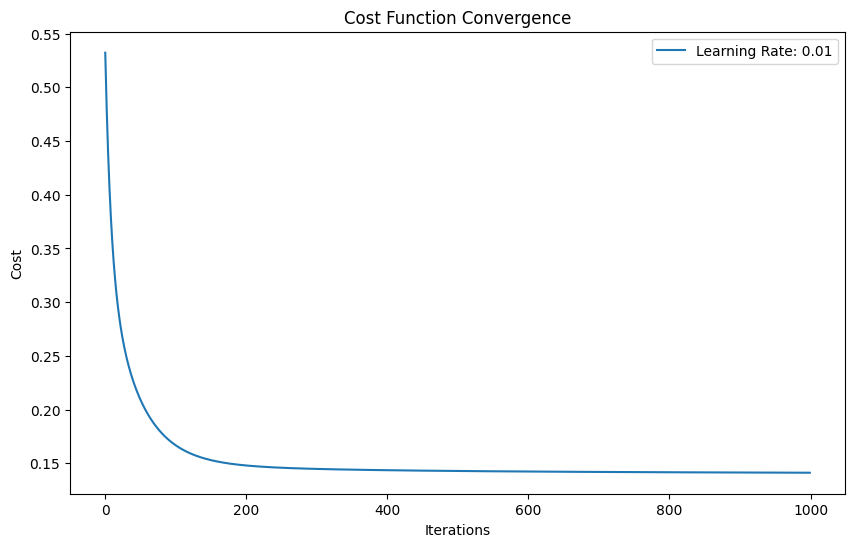

In [154]:
import matplotlib.pyplot as plt

# Plot cost function convergence
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, label=f"Learning Rate: {learning_rate}")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.legend()
plt.show()


Experiment with Different Learning Rates


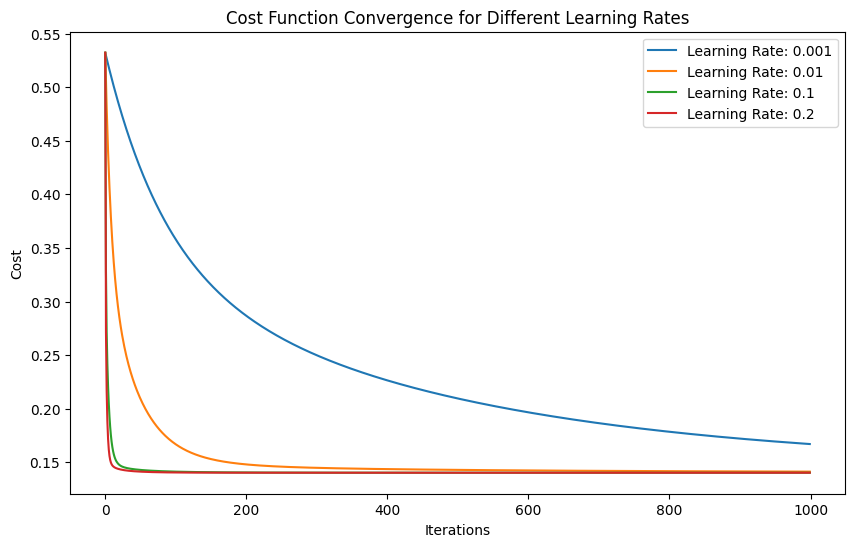

In [156]:
# Test different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.2]
iterations = 1000

plt.figure(figsize=(10, 6))
for lr in learning_rates:
    _, cost_history_lr = gradient_descent(X_train_augmented, y_train_reshaped, theta, lr, iterations)
    plt.plot(range(len(cost_history_lr)), cost_history_lr, label=f"Learning Rate: {lr}")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence for Different Learning Rates")
plt.legend()
plt.show()
